Advanced Machine learning(CS4662). Cal State Univ. LA, CS Dept.



Harshil Patel 
(CIN 306646748)

Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow


In [0]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:
0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

In [0]:
from keras.datasets import fashion_mnist 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [43]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


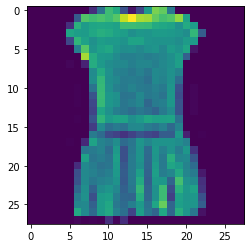

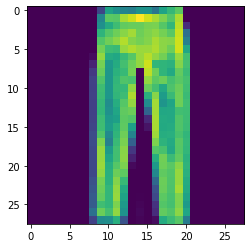

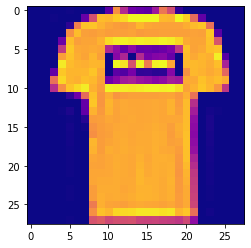

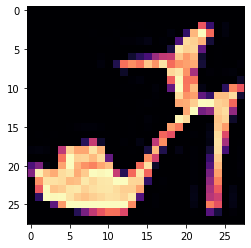

In [44]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [46]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [48]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)



In [50]:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Define the Network Architecture (model):¶

In [0]:
model = Sequential()

In [52]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape) 

(None, 26, 26, 32)


In [53]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)
# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)
# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 24, 24, 32)
(None, 12, 12, 32)


In [54]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4608)
(None, 128)
(None, 10)


Compile the model:
We need to compile the model and then it will be ready to train it:

In [55]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],
              optimizer='adamax')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

Training:

In [56]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0883 - accuracy: 0.9652
Epoch 2/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0634 - accuracy: 0.9752
Epoch 3/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0564 - accuracy: 0.9783
Epoch 4/5
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0515 - accuracy: 0.9799
Epoch 5/5
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0482 - accuracy: 0.9812


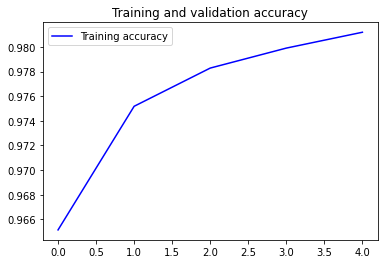

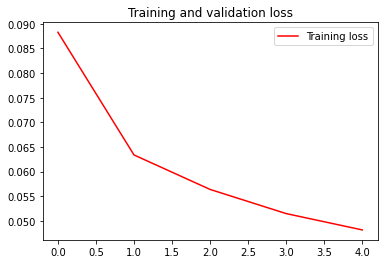

In [57]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

Testing:

In [0]:
predicted_classes = model.predict_classes(X_test)

In [59]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 4s 385us/step
The accuracy is:  0.9823896288871765
